In [461]:
import os
import glob
import subprocess
from concurrent.futures import ThreadPoolExecutor
from multiprocessing import freeze_support
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [462]:
!rm -rf ./out
!mkdir ./out

In [463]:
cur_dir = %pwd

In [464]:
in_files = glob.glob(os.path.join(cur_dir, 'in', '*.txt'))
test_cases = [os.path.basename(f) for f in in_files]   

In [465]:
df = pd.read_csv("test_res.csv", index_col=0)
d = {}

In [466]:
def exec(in_file: str):
    out_file = os.path.join(cur_dir, 'out', os.path.basename(in_file))
    res = subprocess.run(f"./main < {in_file} > {out_file}", shell=True, stderr=subprocess.PIPE)
    s = res.stderr.decode('utf-8').strip().split('\n')[-1].strip()
    test_case = os.path.basename(in_file)
    d[test_case] = int(s)

In [467]:
freeze_support()
with ThreadPoolExecutor(max_workers=50) as executor:
    executor.map(exec, in_files)

cur_time = datetime.datetime.now().isoformat()
df[cur_time] = d

In [468]:
df = df.sort_index()

In [469]:
df.to_csv("test_res.csv")

In [470]:
df = df.iloc[:, -5:]
df = df.applymap(lambda x: np.log10(x) if x > 0 else 0)

In [471]:
df.describe()

,2023-12-23T17:58:30.100644,2023-12-25T16:44:56.135549,2023-12-25T17:03:55.887693,2023-12-25T17:23:24.325784,2023-12-25T17:23:51.175252
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.313739,5.392127,5.448760,4.955822,5.452320
std,1.184529,1.230059,1.234352,0.822219,1.231812
min,0.000000,3.173478,2.053078,1.204120,2.053078
25%,4.435554,4.419095,4.476991,4.386047,4.480204
50%,5.134679,5.240736,5.311505,4.923940,5.321250
75%,6.008953,6.085832,6.154780,5.440691,6.161332
max,9.526210,9.729033,9.742189,9.229202,9.729033


In [472]:
df.iloc[:, -1].mean()

5.452319719904877

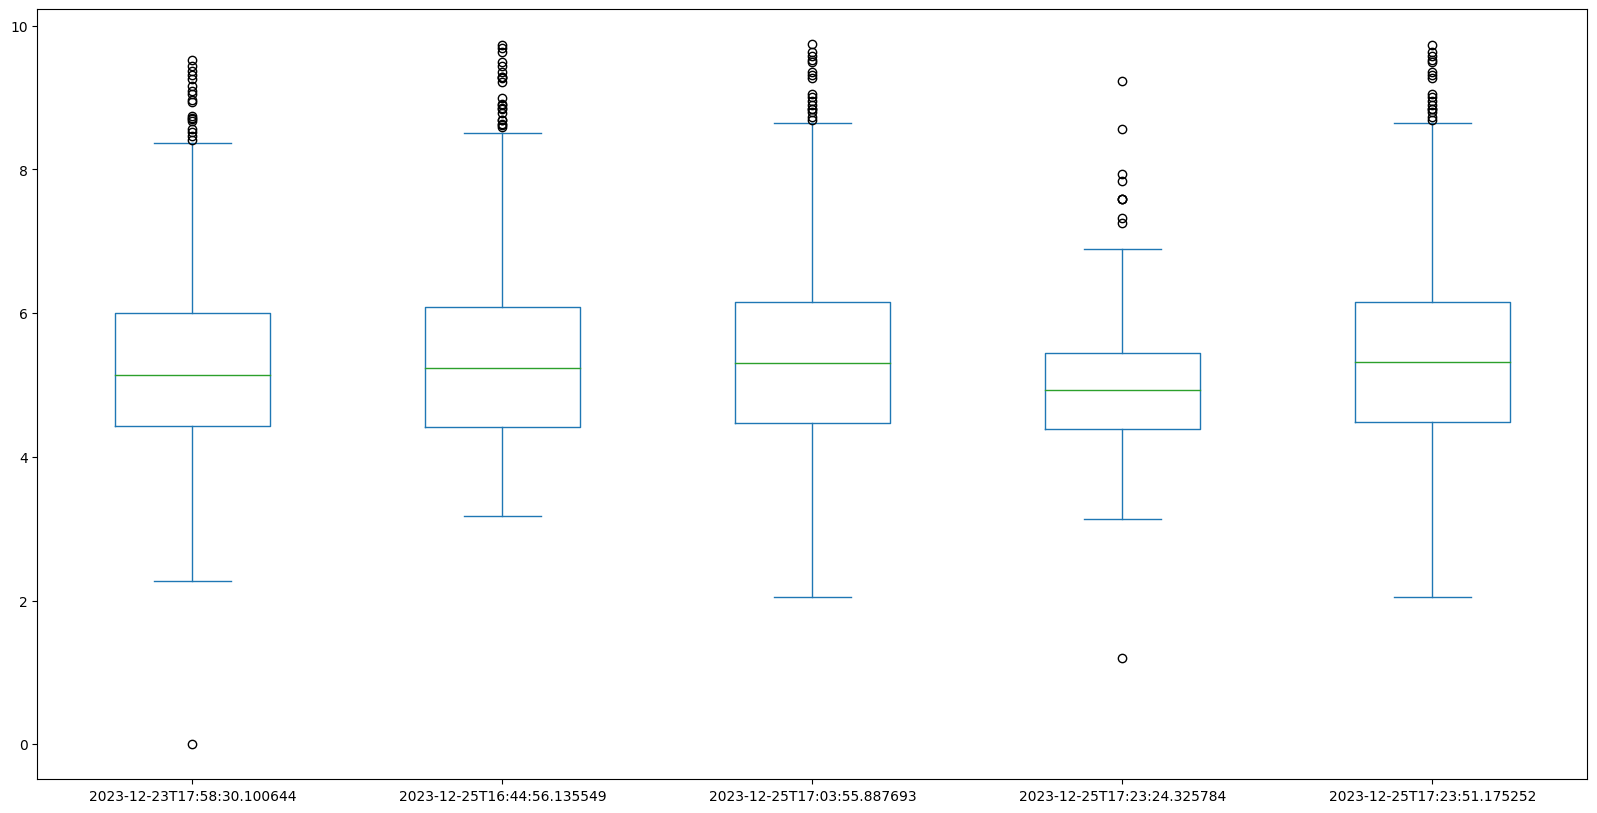

In [473]:
df.plot(kind="box", figsize=(20, 10))
plt.show()

In [474]:
df.sort_values(by=[cur_time], ascending=False)

,2023-12-23T17:58:30.100644,2023-12-25T16:44:56.135549,2023-12-25T17:03:55.887693,2023-12-25T17:23:24.325784,2023-12-25T17:23:51.175252
0369.txt,9.526210,9.729033,9.742189,7.587992,9.729033
0684.txt,8.707094,9.634218,9.634218,6.816389,9.634218
0517.txt,9.320353,9.352180,9.576977,6.843502,9.576977
0759.txt,9.443366,9.688696,9.523461,6.294257,9.523461
0935.txt,9.368765,9.489246,9.489246,7.585803,9.489246
...,...,...,...,...,...
0182.txt,3.666799,3.173478,3.244277,3.632457,3.244277
0709.txt,3.558589,3.180413,3.182700,3.429591,3.180413
0837.txt,5.605191,5.496146,2.686636,5.716683,2.686636
0151.txt,4.927386,4.962194,2.600973,5.500921,2.600973


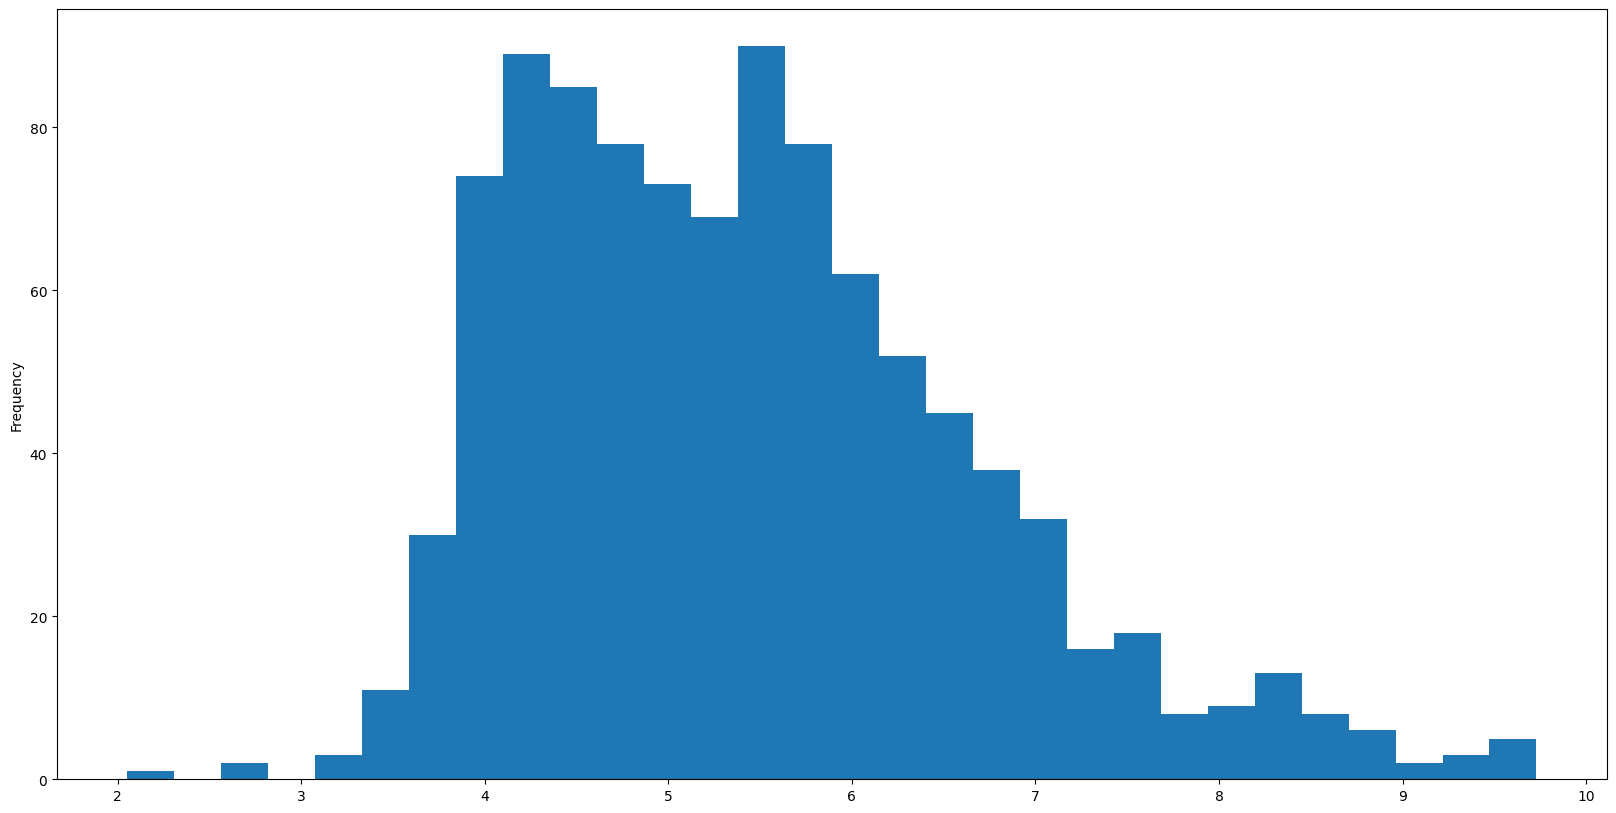

In [475]:
last_df = df.iloc[:, -1]
last_df.plot.hist(bins=30, figsize=(20, 10))
plt.show()

In [476]:
last_df[last_df > 4].sort_values().head(10)

0728.txt    4.001041
0619.txt    4.002080
0804.txt    4.011993
0013.txt    4.012289
0448.txt    4.013848
0615.txt    4.014184
0719.txt    4.026329
0155.txt    4.028571
0902.txt    4.029871
0971.txt    4.032740
Name: 2023-12-25T17:23:51.175252, dtype: float64